In [6]:
import networkx as nx
import requests
import matplotlib as plt

In [7]:
url = 'https://www.ia.pw.edu.pl/~mkamola/dataset-big/4.txt'
r = requests.get(url, allow_redirects=True)
open('4.txt', 'wb').write(r.content)

185860

Zbadaj jaki jest rząd i rozmiar całej sieci: pierwotnej oraz po usunięciu pętli i duplikatów krawędzi (1);

In [8]:

G_multi = nx.read_edgelist("4.txt", create_using=nx.MultiGraph)
G = nx.read_edgelist("4.txt", create_using=nx.Graph)

In [9]:
I1 = nx.info(G_multi) 
print(I1 + '\n')
I2 = nx.info(G) 
print(I2 + '\n')

Name: 
Type: MultiGraph
Number of nodes: 6988
Number of edges: 5537
Average degree:   1.5847

Name: 
Type: Graph
Number of nodes: 6988
Number of edges: 5537
Average degree:   1.5847



In [10]:
nx.number_of_selfloops(G_multi)

256

In [11]:
nx.number_of_selfloops(G)

256

In [12]:
G_multi=nx.Graph(G_multi)

In [13]:
G_multi.remove_edges_from(nx.selfloop_edges(G_multi))
G.remove_edges_from(nx.selfloop_edges(G))

In [14]:
nx.number_of_selfloops(G_multi)

0

In [15]:
nx.number_of_selfloops(G)

0

In [16]:
N1 = nx.info(G_multi) 
print(N1 + '\n')
N2 = nx.info(G) 
print(N2 + '\n')

Name: 
Type: Graph
Number of nodes: 6988
Number of edges: 5281
Average degree:   1.5114

Name: 
Type: Graph
Number of nodes: 6988
Number of edges: 5281
Average degree:   1.5114



Wyodrębnij największą składową spójną, zbadaj jej rząd i rozmiar (1);

In [17]:
nx.is_connected(G)

False

In [18]:
nx.is_connected(G_multi)

False

In [19]:
Set = [len(c) for c in sorted(nx.connected_components(G_multi), key=len, reverse=True)]

In [20]:
largest_cc = max(nx.connected_components(G_multi), key=len)

In [21]:
G_biggest=G_multi.subgraph(largest_cc)

In [22]:
Inf = nx.info(G_biggest)
print(Inf)

Name: 
Type: Graph
Number of nodes: 626
Number of edges: 742
Average degree:   2.3706


In [23]:
nx.number_of_nodes(G_biggest)

626

In [24]:
nx.number_of_edges(G_biggest)

742

Wyznacz aproksymacje średniej długości ścieżki, operując na próbie losowej 100, 1000 i 10 tys. par wierzchołków (2);

In [25]:
import random


In [26]:
n_set = [100, 310, 620]
random_graph=[None] * len(n_set)
create_graph=[None] * len(n_set)
for i in n_set:
    random_graph = random.sample(G_biggest.nodes, i)
    create_graph = G_multi.subgraph(random_graph)
    lar_cc = max(nx.connected_components(create_graph), key=len)
    G_big=create_graph.subgraph(lar_cc)
    #print(nx.info(create_graph))
    print(nx.info(G_big))
    try:
        #aspl = nx.average_shortest_path_length(create_graph)
        aspl1 = nx.average_shortest_path_length(G_big)
        #print(i,aspl)
        print(i,aspl1)
    except nx.NetworkXError:
        print('Cannot count length')


Name: 
Type: Graph
Number of nodes: 6
Number of edges: 5
Average degree:   1.6667
100 1.6666666666666667
Name: 
Type: Graph
Number of nodes: 103
Number of edges: 128
Average degree:   2.4854
310 4.009518370454978
Name: 
Type: Graph
Number of nodes: 620
Number of edges: 733
Average degree:   2.3645
620 6.374777216113398


In [27]:
nx.average_shortest_path_length(G_biggest)

6.3478747603833865

In [28]:
def top_degree(graph, n):
    degree = nx.degree(graph)
    sdegree = sorted(degree,key=lambda n: -n[1])
    return sdegree[0:n]


In [29]:
top_degree(G_multi, 10)

[('net.databinder', 176),
 ('ui', 100),
 ('exo', 74),
 ('core', 53),
 ('geronimo', 51),
 ('org.scalatra', 51),
 ('com.github.philcali', 44),
 ('de.sciss', 44),
 ('org.scala-tools.testing', 42),
 ('maven', 36)]

In [30]:
top_degree(G_biggest,10)

[('ui', 100),
 ('core', 53),
 ('geronimo', 51),
 ('taglibs', 36),
 ('jboss', 32),
 ('org.eclipse.emf', 29),
 ('tomcat', 29),
 ('source', 20),
 ('infopop', 18),
 ('org.eclipse', 17)]

In [31]:
from collections import Counter
core_numbers = nx.core_number(G_biggest)

hist_data = sorted(Counter(core_numbers).items())

# print(nx.info(nx.k_core(G_biggest, k=100)))
# print(nx.info(nx.k_core(G_biggest, k=53)))


wyznacz liczbę rdzeni o największym możliwym rzędzie, o drugim możliwie największym rzędzie o trzecim możliwie największym rzędzie; jakie to są rzędy? (3);


In [32]:
nx.info(nx.k_core(G, k=87))
nx.info(nx.k_core(G, k=88))
nx.info(nx.k_core(G, k=89))


'Name: \nType: Graph\nNumber of nodes: 0\nNumber of edges: 0\n'

wykreśl rozkład stopni wierzchołków (1);


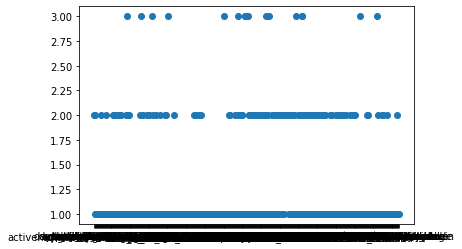

In [33]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*hist_data))


Częstosć stopni wierzchołków

In [34]:
from collections import Counter
import matplotlib as plt
deg_dict = Counter(dlist)
degs = deg_dict.keys()
freqs = deg_dict.values()
plt.loglog(degs , freqs , 'bo')
plt.gcf().savefig('degree_freq.png')
plt.close()

NameError: name 'dlist' is not defined

Wykres rangowy

In [ ]:
cumul=[]
2 for i in range ( len (degs)):
3 cnt = 0
4 for j in range (i, len (degs)):
5 cnt = cnt + freqs[j]
6 cumul.append(cnt)
7 plt.loglog(degs , cumul , ’bo’)

wyznacz wykładnik rozkładu potęgowego metodą regresji dla dopełnienia dystrybuanty rozkładu stopni, dla przedziałów rozlokowanych logarytmicznie (3);


wyznacz wykres Hilla (3).

In [ ]:
import powerlaw
import numpy as np

NBINS = 50
bins = np.logspace(np.log10(min(dlist)),
                   np.log10(max(dlist)), num = NBINS)
bcnt, bedge = np.histogram(np.array(dlist),bins = bins)
alpha = np.zeros(len(bedge[:-2]))


for i in range(0,len(bedge)-2):
    fit=powerlaw.Fit(dlist,xmin=bedge[i], discrete=True)
    alpha[i]=fit.alpha

plt.semilogx(bedge[:-2], alpha)

Porównanie rozkładów

In [ ]:
fit = powerlaw.Fit(dlist, discrete=True)
print 'alpha (disc.) = ' + str(fit.alpha)
fig3 = fit.plot_ccdf(ax = fig3, color = 'r',
                     linestyle = '-')
fit.truncated_power_law.plot_ccdf(ax = fig3, color = 'g',
                                  linestyle = '-')
fit.lognormal.plot_ccdf(ax = fig3, color = 'b',
                        linestyle = '-')